### For the bargain hunters, let's say there's an item you really want (for me, a pricey NASA themed t-shirt). How can a bit of code make getting that shirt as a bargain easier.

### In the notebook below, I will use webscraping to collect vital information about a shirt, put it into a csv file and create two functions to fill up that csv file with other data points and another to send me email alerts when the price drops.

In [23]:
# import libraries 

from bs4 import BeautifulSoup
import requests
import time
import datetime

import smtplib  # For sending emails to myself

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.shift();)b(a[0],a[1],a
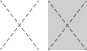
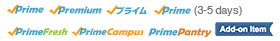

In [24]:
# Connecting to the website in question (An amazon link to a nasa t shirt)

URL = 'https://www.amazon.com/Hanes-Lightweight-Graphic-T-Shirt-Heather/dp/B07CNSM68T/ref=sr_1_1?dchild=1&keywords=NASA&qid=1630359530&s=apparel&sr=1-1'

headers = ({'User-Agent':
            'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36',
            'Accept-Language': 'en-US, en;q=0.5'})

page = requests.get(URL, headers = headers)

soup1 = BeautifulSoup(page.content,"html.parser" )
print(soup1)

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us">
<!-- sp:feature:head-start -->
<head>
<script>
   var aPageStart = (new Date()).getTime();
  </script>
<meta charset="utf-8"/>
<script type="text/javascript">
   var ue_t0=ue_t0||+new Date();
  </script>
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<script type="text/javascript">
   window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.sh
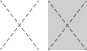
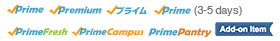

In [25]:
soup2 = BeautifulSoup(soup1.prettify(), "lxml" )  #Literally just makes the html print neater
print(soup2)

In [26]:
title = soup2.find(id='productTitle').get_text()
price = soup2.find(id = 'priceblock_ourprice').get_text()
print(title)
print(price)


                   Hanes Men's Graphic Vintage Cali Collection T-Shirt
                  

                    $9.25 - $18.99
                   


In [27]:
#cleans up the printed info for potential data storage
price=price.strip()
title= title.strip()

print(title)
print(price)

Hanes Men's Graphic Vintage Cali Collection T-Shirt
$9.25 - $18.99


In [6]:
#creating a csv with the info

import csv
header = ['Title', 'Price']
data = [title, price]  #puts the data into a list

with open("AWSDataSet.csv", 'w', newline='', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerow(data)

In [7]:
#Given that this item has a price range, lets put in what date the shirt was recorded at that specific price

import datetime

today = datetime.date.today() #using today

print(today)#year, month, day

2021-09-03


In [81]:
# Lets update the csv file to handle the addition of time

 

header = ['Title', 'Price', 'Date']
data = [title, price, today]


with open('AWSDataSet.csv', 'w', newline='', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerow(data)

In [83]:
import pandas as pd

df = pd.read_csv('C:/Users/dlamb/AWSDataSet.csv')

df.head()

,Title,Price,Date
0,Hanes Men's Graphic Vintage Cali Collection T-...,$9.25 - $18.99,03/09/2021
1,Hanes Men's Graphic Vintage Cali Collection T-...,$9.25 - $18.99,03/09/2021


Since the shirt details have been recorded in a csv file and are accessible in a dataframe format, now its time to fill in some more data points (all the nasa shirts my heart desires)

In [84]:
#a+ makes the csv form editable

with open('AWSDataSet.csv', 'a+', newline='', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(data)

In [127]:
#creating a function to automate all of the steps above

def check_for_price():
    URL = input("Enter URL: ")

    headers = ({'User-Agent':
            'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36',
            'Accept-Language': 'en-US, en;q=0.5'})

    page = requests.get(URL, headers = headers)

    soup1 = BeautifulSoup(page.content,"lxml" )
    soup2 = BeautifulSoup(soup1.prettify(), "lxml" ) 
    
    #print(soup1)
    
    title = soup2.find(id='productTitle').get_text()
    size = soup2.find(class_='selection').get_text()
    price = soup2.find(id = 'priceblock_ourprice').get_text()
    
    

    price=price.strip()
    title= title.strip()
    
    import datetime

    today = datetime.date.today()
    
    import csv 

    header = ['Title', 'Price','Size', 'Date']
    data = [title, price, size.replace("\n" , ""),today]

    with open('AWSDataSet.csv', 'a+', newline='', encoding='UTF8') as f:
        writer = csv.writer(f)
        if f == None:
            writer.writerow(header)
        writer.writerow(data)



    
    #functions don't need to end with a return statement to run =)

In [128]:

check_for_price()


Enter URL: https://www.amazon.com/roll-eyes-Shirt-Funny-sarcastic/dp/B077PQKN21/ref=pd_day0_4/141-3547503-9210860?pd_rd_w=itbb2&pf_rd_p=8ca997d7-1ea0-4c8f-9e14-a6d756b83e30&pf_rd_r=YYGBQAYMABBBTPGHHDXE&pd_rd_r=5a8daa88-4a88-4dec-bc48-27b742a49626&pd_rd_wg=n8pRT&pd_rd_i=B077PQKN21&custo


In [129]:
df = pd.read_csv(r'C:/Users/dlamb/AWSDataSet.csv')

df.head(10)

,Title,Price,Size,Date
0,Did I roll my eyes out loud T Shirt Funny sarc...,$15.99,Men,2021-09-03
1,Did I roll my eyes out loud T Shirt Funny sarc...,$15.99,Men,2021-09-03


Okay, we are cooking with gas, Now if you're really a bargain hunter, you'd want a play by play when that shirt price finally drops. This is how you can send yourself emails when it happens.

In [13]:
def send_mail():
    server = smtplib.SMTP_SSL('smtp.gmail.com',465)
    server.ehlo()
    #server.starttls()
    server.ehlo()
    server.login('Email@gmail.com','xxxxxxxxxxxxxx')
    
    subject = "The Shirt you want is below $15! Now is your chance to buy!"
    body = "Debby, This is the moment we have been waiting for. Now is your chance to pick up the shirt of your dreams. Don't mess it up!"
    msg = f"Subject: {subject}\n\n{body}"
    
    server.sendmail(
        'Email@gmail.com',
        msg
     
    )

Some additions include: Using a timer to scrape for bargains for a set time and triggering an email if the price drops below a certain point.

In [ ]:
#for example to be added into check_for_price() for very determined bargain hunters

#timer

while(True):
    check_for_price()
    time.sleep(5)   # 5 seconds
    

    
#email trigger

    if (price < 12):
        send_mail()